<a href="https://colab.research.google.com/github/kd303/tensorflow_coursera/blob/master/Exercise4_Question_happy_sad_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [19]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > DESIRED_ACCURACY):
      print("\n Reached "+str(DESIRED_ACCURACY)+" accuracy stopping the training")
      model.stop_training = True

callbacks = myCallback()

--2019-08-02 11:58:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-08-02 11:58:51 (129 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



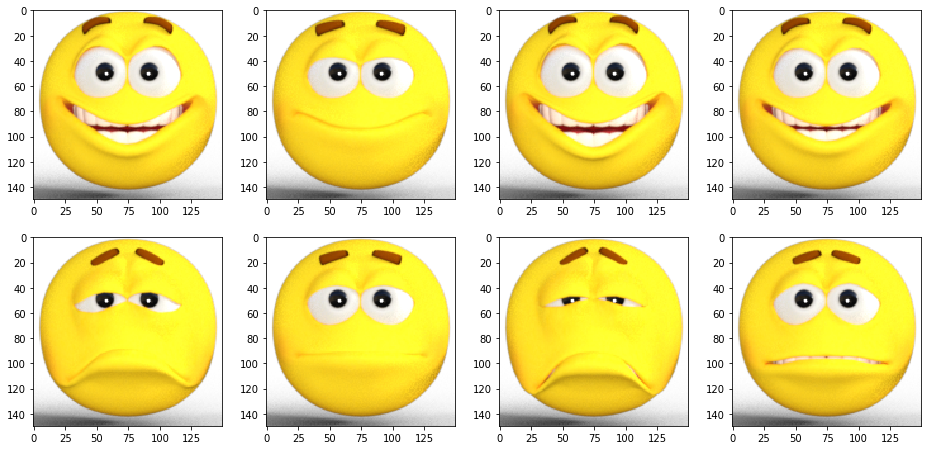

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrow = 4 
ncol = 4

fig = plt.gcf()
fig.set_size_inches(4*nrow, 4*ncol)

## directory names
happy_face_dir = '/tmp/h-or-s/happy'
sad_face_dir = '/tmp/h-or-s/sad'


happy_faces = os.listdir(happy_face_dir)
sad_faces = os.listdir(sad_face_dir)

pic_ind = 0
# lets take some random images for display
happy_f_images = [os.path.join(happy_face_dir, fname) for fname in happy_faces[0:4]]
sad_f_images = [os.path.join(sad_face_dir, fname) for fname in sad_faces[0:4]]

for i, imagepath in enumerate(happy_f_images+sad_f_images):
  subplt = plt.subplot(nrow, ncol, i + 1)
  img = mpimg.imread(imagepath)
  #print(img.shape)
  plt.imshow(img)


In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [29]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [32]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator, steps_per_epoch=20, epochs=15, verbose=2, callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
20/20 - 2s - loss: 1.6090 - acc: 0.6550
Epoch 2/15
20/20 - 1s - loss: 0.1830 - acc: 0.9250
Epoch 3/15
20/20 - 1s - loss: 0.0472 - acc: 0.9850
Epoch 4/15

 Reached 0.999 accuracy stopping the training
20/20 - 1s - loss: 0.0027 - acc: 1.0000
